In [1]:
%cd ..

/home/pablo/long-transformers


In [2]:
# add the project root to the python path
import sys
sys.path.append('.')

In [3]:
import pandas as pd
import seaborn as sns

## Listops

In [14]:
df = pd.read_csv("datasets/lra_release/listops-1000/basic_train_compressed.tsv", sep="\t")

In [11]:
df = pd.read_csv("datasets/lra_release/listops-1000/basic_test.tsv", sep="\t")
df["Source"] = df["Source"].str.replace(r'[()]', '', regex=True)
df["Source"] = df["Source"].str.replace(r'\s+', ' ', regex=True)
df["Source"] = df["Source"].str.strip()

In [12]:
df

,Source,Target
0,[MED 7 9 3 1 9 [MAX 3 4 9 [MIN 1 3 2 3 9 [MED ...,8
1,[MED 0 9 0 7 [MIN [MIN 1 8 [MIN [SM 0 [MED [MA...,5
2,[MAX 0 5 [SM 5 5 ] [MED [MED 0 [MIN 9 0 9 5 6 ...,5
3,[MIN 5 0 [MED 7 1 7 4 ] 1 4 [MED 7 2 3 [SM [MI...,0
4,[MED [SM 8 1 [MAX 6 3 ] 2 2 [MED 3 6 3 3 [MIN ...,7
...,...,...
1995,[MIN 4 [MIN 4 5 1 [MIN 6 2 4 7 7 7 2 7 3 ] [ME...,1
1996,[MIN [MAX [MIN 7 8 8 7 ] 0 8 [MED [MAX 0 [MAX ...,2
1997,[MIN [MIN [MED 9 [MED 2 8 7 ] 7 6 9 0 ] 9 7 3 ...,0
1998,[MED [SM 1 [SM 9 7 5 1 2 4 ] 1 1 6 [SM 2 [MED ...,3


In [7]:
tokens = []
max_len = -1
for txt in df["Source"]:
    new_tokens = txt.split()
    for token in new_tokens:
        if token.startswith("[") or token.startswith("("):
            tokens.append(token)
        elif token.endswith("]") or token.endswith(")"):
            tokens.pop()
        max_len = max(max_len, len(tokens))
    if len(tokens) > 0:
        print("Wrong number of tokens!")

In [8]:
print(max_len)

95


In [18]:
lengths = []
tokens = set()
cnt = 0
for txt in df["Source"]:
    new_tokens = txt.split()
    tokens.update(new_tokens)
    l = len(new_tokens)
    lengths.append(l)
    if l > 2048:
        cnt += 1
print(cnt)

0


<Axes: ylabel='Density'>

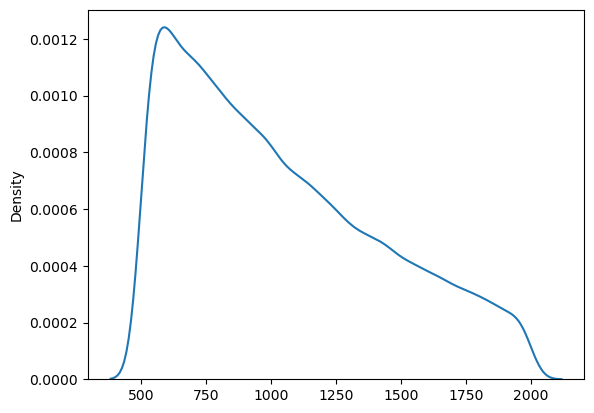

In [19]:
sns.kdeplot(lengths)

In [21]:
print(max(lengths))

1999


In [20]:
len(tokens)

15

## Text classification

In [4]:
from src.data_loaders.text_classification import TextClassificationDataset

/home/pablo/.micromamba/envs/long-transformers/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ds = TextClassificationDataset("datasets/aclImdb", "train")

In [15]:
sizes = []
cnt = 0
for idx in range(len(ds)):
    l = len(ds[idx]["text"])
    sizes.append(l)
    if l > 3000:
        cnt += 1


<Axes: ylabel='Density'>

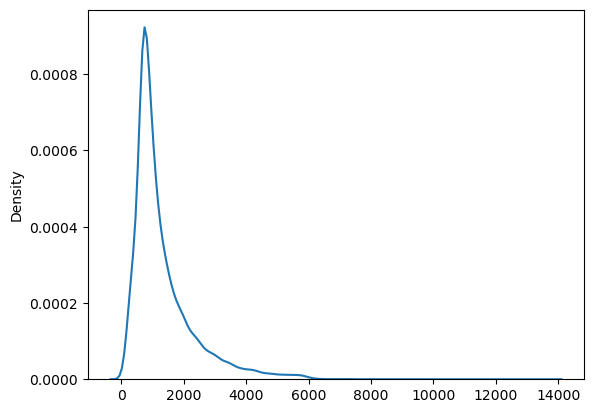

In [16]:
sns.kdeplot(sizes)

In [17]:
cnt

1813

In [14]:
len(ds)

25000